<a href="https://colab.research.google.com/github/mabittar/Learn/blob/master/Covid19_bar_chart_race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

from datetime import datetime
import re

import numpy as np
import pandas as pd


In [0]:
date_pattern = re.compile(r"\d{1,2}/\d{1,2}/\d{2}")
def reformat_dates(col_name: str) -> str:
    # for columns which are dates, I'd much rather they were in day/month/year format
    try:
        return date_pattern.sub(datetime.strptime(col_name, "%m/%d/%y").strftime("%d/%m/%Y"), col_name, count=1)
    except ValueError:
        return col_name

In [0]:
# this github repo contains timeseries data for all coronavirus cases: https://github.com/CSSEGISandData/COVID-19
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/" \
                      "csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/" \
             "csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

In [92]:
renamed_columns_map = {
    "Country/Region": "country",
    "Province/State": "location",
    "Lat": "latitude",
    "Long": "longitude"
}

cols_to_drop = ["location", "latitude", "longitude"]

confirmed_cases_df = (
    pd.read_csv(confirmed_cases_url)
    .rename(columns=renamed_columns_map)
    .rename(columns=reformat_dates)
    .drop(columns=cols_to_drop)
    
    
)
deaths_df = (
    pd.read_csv(deaths_url)
    .rename(columns=renamed_columns_map)
    .rename(columns=reformat_dates)
    .drop(columns=cols_to_drop)
       
)
print("Confirmed Cases")
display(confirmed_cases_df.head())
print("Deaths")
display(deaths_df.head())

Confirmed Cases


,country,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,27/01/2020,28/01/2020,29/01/2020,30/01/2020,31/01/2020,01/02/2020,02/02/2020,03/02/2020,04/02/2020,05/02/2020,06/02/2020,07/02/2020,08/02/2020,09/02/2020,10/02/2020,11/02/2020,12/02/2020,13/02/2020,14/02/2020,15/02/2020,16/02/2020,17/02/2020,18/02/2020,19/02/2020,20/02/2020,21/02/2020,22/02/2020,23/02/2020,24/02/2020,25/02/2020,26/02/2020,27/02/2020,28/02/2020,29/02/2020,01/03/2020,02/03/2020,03/03/2020,04/03/2020,05/03/2020,06/03/2020,07/03/2020,08/03/2020,09/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,14/03/2020,15/03/2020,16/03/2020,17/03/2020,18/03/2020
0,Thailand,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212
1,Japan,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889
2,Singapore,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313
3,Nepal,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790


Deaths


,country,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,27/01/2020,28/01/2020,29/01/2020,30/01/2020,31/01/2020,01/02/2020,02/02/2020,03/02/2020,04/02/2020,05/02/2020,06/02/2020,07/02/2020,08/02/2020,09/02/2020,10/02/2020,11/02/2020,12/02/2020,13/02/2020,14/02/2020,15/02/2020,16/02/2020,17/02/2020,18/02/2020,19/02/2020,20/02/2020,21/02/2020,22/02/2020,23/02/2020,24/02/2020,25/02/2020,26/02/2020,27/02/2020,28/02/2020,29/02/2020,01/03/2020,02/03/2020,03/03/2020,04/03/2020,05/03/2020,06/03/2020,07/03/2020,08/03/2020,09/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,14/03/2020,15/03/2020,16/03/2020,17/03/2020,18/03/2020
0,Thailand,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Japan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,4,4,5,6,6,6,6,6,6,6,6,10,10,15,16,19,22,22,27,29,29
2,Singapore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Nepal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Malaysia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2


In [68]:
missing_data_deaths = deaths_df.isnull()
missing_data_deaths.head()

,country,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,27/01/2020,28/01/2020,29/01/2020,30/01/2020,31/01/2020,01/02/2020,02/02/2020,03/02/2020,04/02/2020,05/02/2020,06/02/2020,07/02/2020,08/02/2020,09/02/2020,10/02/2020,11/02/2020,12/02/2020,13/02/2020,14/02/2020,15/02/2020,16/02/2020,17/02/2020,18/02/2020,19/02/2020,20/02/2020,21/02/2020,22/02/2020,23/02/2020,24/02/2020,25/02/2020,26/02/2020,27/02/2020,28/02/2020,29/02/2020,01/03/2020,02/03/2020,03/03/2020,04/03/2020,05/03/2020,06/03/2020,07/03/2020,08/03/2020,09/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,14/03/2020,15/03/2020,16/03/2020,17/03/2020,18/03/2020
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [69]:
missing_data_confirmed = confirmed_cases_df.isnull()
missing_data_confirmed.head()

,country,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,27/01/2020,28/01/2020,29/01/2020,30/01/2020,31/01/2020,01/02/2020,02/02/2020,03/02/2020,04/02/2020,05/02/2020,06/02/2020,07/02/2020,08/02/2020,09/02/2020,10/02/2020,11/02/2020,12/02/2020,13/02/2020,14/02/2020,15/02/2020,16/02/2020,17/02/2020,18/02/2020,19/02/2020,20/02/2020,21/02/2020,22/02/2020,23/02/2020,24/02/2020,25/02/2020,26/02/2020,27/02/2020,28/02/2020,29/02/2020,01/03/2020,02/03/2020,03/03/2020,04/03/2020,05/03/2020,06/03/2020,07/03/2020,08/03/2020,09/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,14/03/2020,15/03/2020,16/03/2020,17/03/2020,18/03/2020
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [0]:
df = confirmed_cases_df

In [0]:
#df_1 = deaths_df

In [72]:
confirmed_cases_df.isnull

<bound method DataFrame.isnull of             country  22/01/2020  23/01/2020  ...  16/03/2020  17/03/2020  18/03/2020
0          Thailand           2           3  ...         147         177         212
1             Japan           2           1  ...         825         878         889
2         Singapore           0           1  ...         243         266         313
3             Nepal           0           0  ...           1           1           1
4          Malaysia           0           0  ...         566         673         790
..              ...         ...         ...  ...         ...         ...         ...
457     Netherlands           0           0  ...           2           3           4
458          Zambia           0           0  ...           0           0           2
459        Djibouti           0           0  ...           0           0           1
460     Gambia, The           0           0  ...           0           1           1
461  United Kingdom           0

In [0]:
df.dropna(subset=["country"], axis=0, inplace = True)
#df_1.dropna(subset=["country"], axis=0, inplace = True)

In [74]:
df.describe(include = "all")

,country,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,27/01/2020,28/01/2020,29/01/2020,30/01/2020,31/01/2020,01/02/2020,02/02/2020,03/02/2020,04/02/2020,05/02/2020,06/02/2020,07/02/2020,08/02/2020,09/02/2020,10/02/2020,11/02/2020,12/02/2020,13/02/2020,14/02/2020,15/02/2020,16/02/2020,17/02/2020,18/02/2020,19/02/2020,20/02/2020,21/02/2020,22/02/2020,23/02/2020,24/02/2020,25/02/2020,26/02/2020,27/02/2020,28/02/2020,29/02/2020,01/03/2020,02/03/2020,03/03/2020,04/03/2020,05/03/2020,06/03/2020,07/03/2020,08/03/2020,09/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,14/03/2020,15/03/2020,16/03/2020,17/03/2020,18/03/2020
count,462,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
unique,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.201299,1.413420,2.036797,3.103896,4.584416,6.335498,12.073593,13.346320,17.822511,21.487013,26.056277,36.335498,43.032468,51.714286,59.816017,66.703463,74.439394,80.346320,86.904762,92.558442,96.974026,97.880952,130.666667,144.772727,149.415584,154.164502,158.567100,162.632035,163.720779,164.928571,166.283550,170.084416,170.919913,172.225108,174.054113,176.179654,179.121212,182.077922,186.170996,191.274892,195.467532,200.952381,205.887446,211.865801,220.311688,229.049784,237.651515,245.803030,256.692641,272.435065,277.798701,314.270563,337.865801,362.437229,392.915584,426.714286,465.173160
std,NaN,20.708297,20.792959,25.900208,36.062942,50.412877,67.934111,166.507245,167.590443,230.917736,273.793450,336.896685,523.345352,632.611813,779.603278,918.652955,1032.660278,1164.900128,1264.888657,1382.595175,1480.138612,1556.359217,1556.658334,2245.535032,2533.645344,2619.375809,2709.266560,2793.286362,2872.003896,2888.262233,2907.369467,2917.687171,2983.790757,2983.854544,2993.374958,3016.636707,3035.474069,3055.004375,3070.635719,3091.903162,3120.304095,3131.746815,3141.358707,3150.236321,3161.178248,3174.620564,3188.159437,3201.004355,3216.131465,3228.733859,3254.587449,3262.349350,3334.667826,3397.248691,3469.641132,3555.364285,3655.218904,3791.091715
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [75]:
#df_1.describe(include= "all")

,country,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020,27/01/2020,28/01/2020,29/01/2020,30/01/2020,31/01/2020,01/02/2020,02/02/2020,03/02/2020,04/02/2020,05/02/2020,06/02/2020,07/02/2020,08/02/2020,09/02/2020,10/02/2020,11/02/2020,12/02/2020,13/02/2020,14/02/2020,15/02/2020,16/02/2020,17/02/2020,18/02/2020,19/02/2020,20/02/2020,21/02/2020,22/02/2020,23/02/2020,24/02/2020,25/02/2020,26/02/2020,27/02/2020,28/02/2020,29/02/2020,01/03/2020,02/03/2020,03/03/2020,04/03/2020,05/03/2020,06/03/2020,07/03/2020,08/03/2020,09/03/2020,10/03/2020,11/03/2020,12/03/2020,13/03/2020,14/03/2020,15/03/2020,16/03/2020,17/03/2020,18/03/2020
count,462,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
unique,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.036797,0.038961,0.056277,0.090909,0.121212,0.177489,0.283550,0.287879,0.370130,0.461039,0.560606,0.783550,0.922078,1.064935,1.220779,1.372294,1.556277,1.744589,1.961039,2.192641,2.409091,2.419913,2.967532,3.296537,3.606061,3.831169,4.043290,4.344156,4.593074,4.863636,4.872294,5.320346,5.344156,5.690476,5.861472,5.995671,6.090909,6.216450,6.365801,6.484848,6.677489,6.839827,7.043290,7.246753,7.489177,7.701299,8.229437,8.632035,9.225108,9.989177,10.216450,11.696970,12.595238,13.939394,15.424242,17.110390,18.902597
std,NaN,0.790912,0.792178,1.118312,1.861927,2.420633,3.537051,5.816025,5.816558,7.537859,9.491496,11.584810,16.283441,19.260808,22.284692,25.541149,28.751307,32.519577,36.288129,40.521902,45.313702,49.687127,49.687233,60.945666,67.784979,74.251731,78.903561,83.230766,89.372290,94.396238,99.745451,99.745201,109.142175,109.142013,116.073904,119.238156,121.657961,122.870566,124.781878,126.883136,128.474677,130.452050,131.977371,133.711081,135.252442,136.759582,138.218466,140.197519,141.954802,144.270027,147.667776,148.536887,155.947051,160.583246,170.022330,180.574588,192.647022,209.185771
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [0]:
current_date = df.columns[-1]

In [77]:
date_graph = current_date
datetime.strptime(date_graph, "%d/%m/%Y")
print(date_graph)

18/03/2020


In [0]:
df_grouped = df[['country', current_date ]]
#df_1_grouped =df_1[['country', current_date]]

In [0]:
#df_grouped_all = pd.concat([df_grouped, df_1_grouped], ignore_index=True, sort=True)

In [80]:
df_grouped.sort_values(current_date, ascending= False)

,country,18/03/2020
154,China,67800
16,Italy,35713
155,Iran,17361
18,Spain,13910
11,Germany,12327
...,...,...
332,US,0
333,US,0
334,US,0
335,US,0


In [0]:
aggregation_functions = {'country': 'first', current_date: 'sum'}
df_new = df_grouped.groupby(df_grouped['country']).aggregate(aggregation_functions)

In [0]:
dff =df_new.sort_values(current_date, ascending= False).head(10)
dff = dff[::-1]   # flip values from top to bottom
dff

,country,18/03/2020
country,,
United Kingdom,United Kingdom,2642
Switzerland,Switzerland,3028
US,US,7783
"Korea, South","Korea, South",8413
France,France,9105
Germany,Germany,12327
Spain,Spain,13910
Iran,Iran,17361
Italy,Italy,35713


Text(0.5, 0, 'Confirmed Corona Cases')

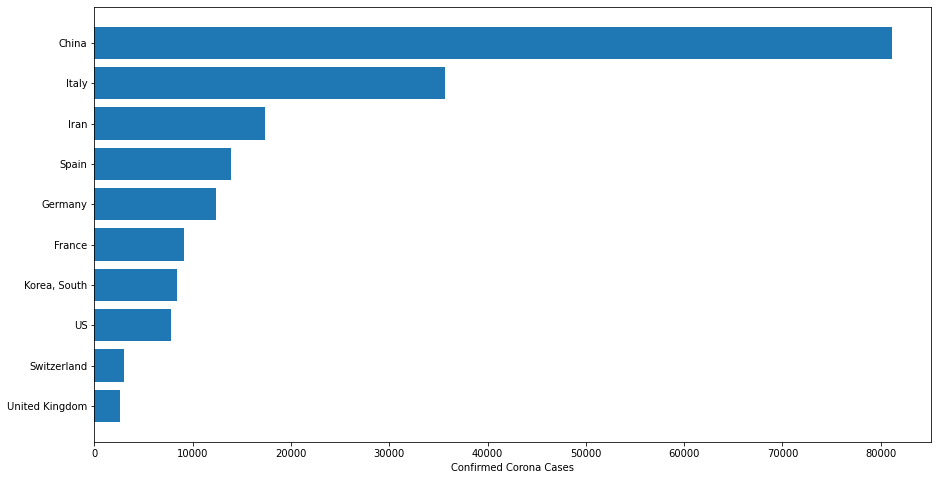

In [0]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['country'], dff[current_date])
ax.set_xlabel('Confirmed Corona Cases')


In [0]:
print(current_date)

18/03/2020


Text(1, 0.4, '18/03/2020')

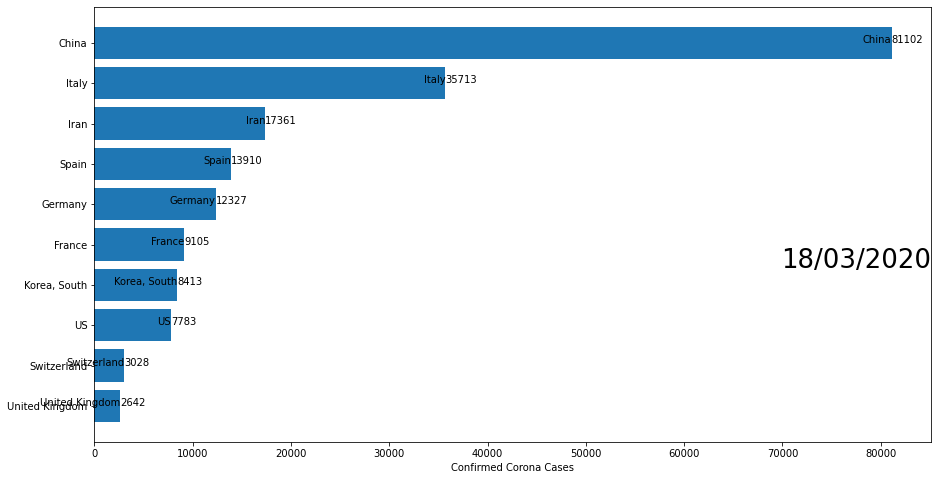

In [0]:
#data

df_grouped1 = df[['country', current_date ]]
aggregation_functions = {'country': 'first', current_date: 'sum'}
df_new1 = df_grouped1.groupby(df_grouped1['country']).aggregate(aggregation_functions)
dff1 = df_new1.sort_values(current_date, ascending= False).head(10)
dff1 = dff1[::-1]

#plot data
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff1['country'], dff1[current_date])

# iterate over the values to plot labels and values (China, 38194.2)
for i, (current_date, country) in enumerate(zip(dff1[current_date], dff1['country'])):
   ax.text(current_date, i,     country,            ha='right')  # China: country
   ax.text(current_date, i,     current_date,   ha='left')   # 38194.2: current_date

ax.set_xlabel('Confirmed Corona Cases')
ax.text(1, 0.4, date_graph, transform=ax.transAxes, size=26, ha='right')



In [0]:
first_date = df.columns[1]
#datetime.strptime(first_date, "%d/%m/%Y")
print(first_date)


22/01/2020


In [0]:
last_date = df.columns[-1]
#datetime.strptime(last_date, "%d/%m/%Y")
print(last_date)

18/03/2020


In [0]:
print(first_date)
print(last_date)

22/01/2020
18/03/2020


In [0]:
current_date = date_graph
print(current_date)

15/02/2020


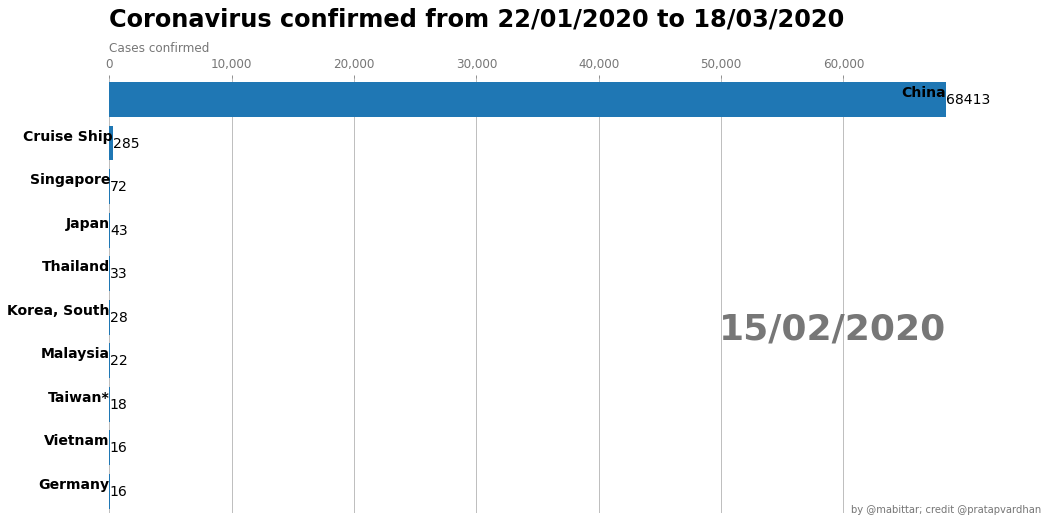

In [0]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_date):
    dff =df_new.sort_values(current_date, ascending= True).tail(10)
    ax.clear()
    ax.barh(dff['country'], dff[current_date]), 
    

    for i, (current_date, country) in enumerate(zip(dff[current_date], dff['country'])):
        ax.text(current_date, i,     country,                  size=14, weight=600, ha='right', va='bottom')  # China: country
        ax.text(current_date, i,     current_date,             size=14, ha='left',  va='center')              # 38194.2: current_date


    # ... polished styles
    ax.text(1, 0.4, date_graph, transform=ax.transAxes, color='#777777', size=36, ha='right', weight=800)
    ax.text(0, 1.06, 'Cases confirmed', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Coronavirus confirmed from {} to {}'.format(first_date,last_date),
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @mabittar; credit @pratapvardhan', transform=ax.transAxes, ha='center',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(current_date)

In [0]:
date_providor = int(list(df))
print(date_providor)

In [87]:
date_providor[1]

"'"

In [0]:
global mylist
for i in range (date_providor[0], date_providor[-1]):
  df_grouped2 = df[['country',i]].tolist()
  #df = pd.DataFrame(data, columns = ['Name', 'Age'])  
  aggregation_functions1 = {'country': 'first', i: 'sum'}
  df_new2 = df_grouped2.groupby(df_grouped2['country']).aggregate(aggregation_functions)
  dff2 =df_new2.sort_values(i, ascending= False).head(10)
  mylist.append(dff2)

In [0]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(first_date, last_date))
HTML(animator.to_jshtml()) 